In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECV
from src import plotting
from src.utils import select_N_one_standard_error

# Load results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection_update/rfecvS_diffSeeds'
proc = GatherFeatureDatasets(is_p=False)

In [3]:
feature_names = proc.get_feature_names(18, 'dist', False)
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [4]:
feature_plot_names = proc.get_feature_plot_names(18, 'dist')
feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'ratio 5', 'ratio 6',
       'ratio 7', 'ratio 8', 'ratio 9', 'ratio 10', 'ratio 11',
       'ratio 12', 'ratio 13', 'ratio 14', 'ratio 15', 'ratio 16',
       'ratio 17', 'ratio 18', 'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4',
       'amp. 5', 'amp. 6', 'amp. 7', 'amp. 8', 'amp. 9', 'amp. 10',
       'amp. 11', 'amp. 12', 'amp. 13', 'amp. 14', 'amp. 15', 'amp. 16',
       'amp. 17', 'amp. 18', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

In [5]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfecv.json')) as fp:
    rfecv_results_dict = json.load(fp)

In [6]:
with open(os.path.join(datadir, 'all.SVR.DT.rel.rfe.full.json')) as fp:
    full_rfe_results_dict = json.load(fp)

# Results summary

In [7]:
plotting.set_default_fontsizes()

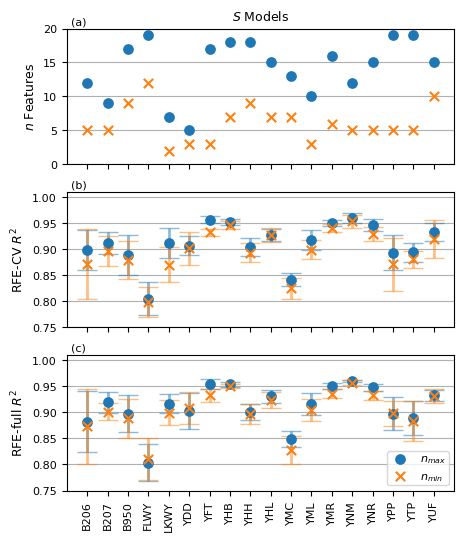

In [32]:
plotting.plot_rfecv_score_summary(rfecv_results_dict, 
                                    full_rfe_results_dict,
                                    capsize=7,
                                    score_ylims=[0.75, 1.01],
                                    grids=True,
                                    elinewidth=2,
                                    s=45,
                                    plot_N=True,
                                    N_ylims=[0, 20],
                                    figsize=(5, 6),
                                    savefigname='../figures/RFE_summary_S.png',
                                    title='$\it{S}$ Models')

# RFECV Results - Best *N*

# 

In [9]:
# Save without filtering out zero rows
best_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False)
best_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.best.csv'))

best_feat_cnts_df = best_feat_cnts_df.loc[~(best_feat_cnts_df==0).all(axis=1)]

In [10]:
best_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(best_feat_cnts_df)
best_feat_summary_df

,Feature,cnt
38,distance,180
37,depth,160
39,back az.,143
19,amp. 2,141
21,amp. 4,130
36,noise var.,128
35,sig. var.,125
18,amp. 1,111
33,noise max. amp.,107
20,amp. 3,97


In [11]:
best_feat_summary_df['rank'] = np.arange(best_feat_summary_df.shape[0])
best_feat_summary_df

,Feature,cnt,rank
38,distance,180,0
37,depth,160,1
39,back az.,143,2
19,amp. 2,141,3
21,amp. 4,130,4
36,noise var.,128,5
35,sig. var.,125,6
18,amp. 1,111,7
33,noise max. amp.,107,8
20,amp. 3,97,9


In [12]:
best_feat_summary_df[best_feat_summary_df.cnt > best_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
38,distance,180,0
37,depth,160,1
39,back az.,143,2
19,amp. 2,141,3
21,amp. 4,130,4
36,noise var.,128,5
35,sig. var.,125,6
18,amp. 1,111,7
33,noise max. amp.,107,8
20,amp. 3,97,9


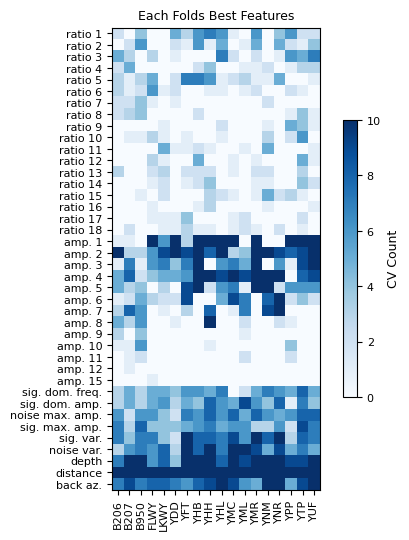

In [13]:
plotting.plot_rfecv_feature_heatmap(best_feat_cnts_df,
                                    figsize=(6, 6),
                                    title='Each Folds Best Features')

# RFECV Results 1 St. Error *N*

In [14]:
# Save without filtering out zero rows
oste_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                      feature_plot_names,
                      CustomRFECV.get_rfecv_important_feature_counts,
                      oste_feats=True,
                      filter_zeros=False)
oste_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.oste.csv'))
oste_feat_cnts_df = oste_feat_cnts_df.loc[~(oste_feat_cnts_df==0).all(axis=1)]

In [15]:
oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(oste_feat_cnts_df)
oste_feat_summary_df

,Feature,cnt
35,distance,165
17,amp. 2,99
16,amp. 1,99
19,amp. 4,83
34,depth,67
18,amp. 3,65
20,amp. 5,49
32,sig. var.,31
21,amp. 6,31
36,back az.,29


In [16]:
oste_feat_summary_df['rank'] = np.arange(oste_feat_summary_df.shape[0])
oste_feat_summary_df

,Feature,cnt,rank
35,distance,165,0
17,amp. 2,99,1
16,amp. 1,99,2
19,amp. 4,83,3
34,depth,67,4
18,amp. 3,65,5
20,amp. 5,49,6
32,sig. var.,31,7
21,amp. 6,31,8
36,back az.,29,9


In [17]:
oste_feat_summary_df[oste_feat_summary_df.cnt > oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
35,distance,165,0
17,amp. 2,99,1
16,amp. 1,99,2
19,amp. 4,83,3
34,depth,67,4
18,amp. 3,65,5
20,amp. 5,49,6
32,sig. var.,31,7
21,amp. 6,31,8


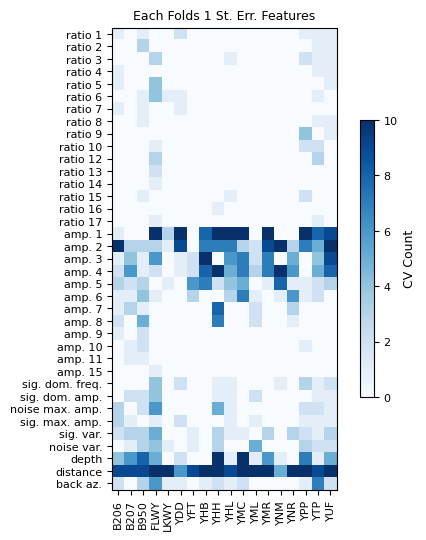

In [18]:
plotting.plot_rfecv_feature_heatmap(oste_feat_cnts_df,
                                    figsize=(6, 6),
                                    title='Each Folds 1 St. Err. Features')

# Best *N* Selected Features from Full Training Sets

In [19]:
selected_best_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False)
selected_best_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.best.csv'))
selected_best_features_df = selected_best_features_df.loc[~(selected_best_features_df==0).all(axis=1)]

In [20]:
sel_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_best_features_df)
sel_feat_summary_df

,Feature,cnt
35,distance,18
33,noise var.,16
34,depth,16
18,amp. 2,15
36,back az.,15
20,amp. 4,15
32,sig. var.,13
28,sig. dom. freq.,12
21,amp. 5,11
29,sig. dom. amp.,11


In [21]:
sel_feat_summary_df['rank'] = np.arange(sel_feat_summary_df.shape[0])
sel_feat_summary_df

,Feature,cnt,rank
35,distance,18,0
33,noise var.,16,1
34,depth,16,2
18,amp. 2,15,3
36,back az.,15,4
20,amp. 4,15,5
32,sig. var.,13,6
28,sig. dom. freq.,12,7
21,amp. 5,11,8
29,sig. dom. amp.,11,9


In [22]:
sel_feat_summary_df[sel_feat_summary_df.cnt > sel_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
35,distance,18,0
33,noise var.,16,1
34,depth,16,2
18,amp. 2,15,3
36,back az.,15,4
20,amp. 4,15,5
32,sig. var.,13,6
28,sig. dom. freq.,12,7


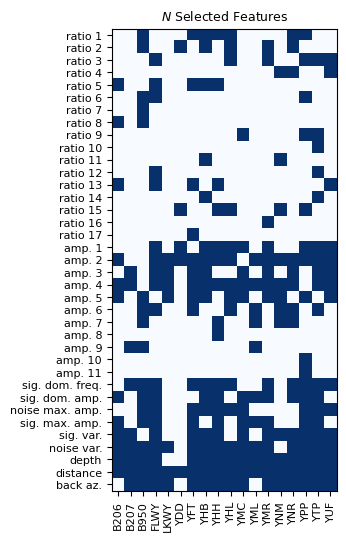

In [23]:
plotting.plot_rfecv_feature_heatmap(selected_best_features_df, 
                                    plot_colorbar=False,
                                    figsize=(5, 6),
                                    title='$\it{N}$ Selected Features')

# 1 St. Err. *N* Selected Features from Full Training Sets

In [24]:
selected_oste_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          oste_feats=True,
                                          filter_zeros=False)
selected_oste_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.oste.csv'))
selected_oste_features_df = selected_oste_features_df.loc[~(selected_oste_features_df==0).all(axis=1)]                                         

In [25]:
sel_oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_oste_features_df)
sel_oste_feat_summary_df

,Feature,cnt
19,distance,18
5,amp. 2,11
7,amp. 4,11
18,depth,10
4,amp. 1,10
8,amp. 5,8
6,amp. 3,7
20,back az.,5
16,sig. var.,5
17,noise var.,4


In [26]:
sel_oste_feat_summary_df['rank'] = np.arange(sel_oste_feat_summary_df.shape[0])
sel_oste_feat_summary_df

,Feature,cnt,rank
19,distance,18,0
5,amp. 2,11,1
7,amp. 4,11,2
18,depth,10,3
4,amp. 1,10,4
8,amp. 5,8,5
6,amp. 3,7,6
20,back az.,5,7
16,sig. var.,5,8
17,noise var.,4,9


In [27]:
sel_oste_feat_summary_df[sel_oste_feat_summary_df.cnt > sel_oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt,rank
19,distance,18,0
5,amp. 2,11,1
7,amp. 4,11,2
18,depth,10,3
4,amp. 1,10,4


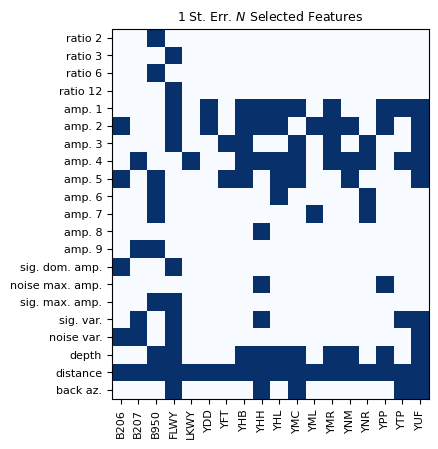

In [28]:
plotting.plot_rfecv_feature_heatmap(selected_oste_features_df, 
                                    plot_colorbar=False,
                                    title='1 St. Err. $\it{N}$ Selected Features')

In [29]:
sum_merge=best_feat_summary_df.merge(oste_feat_summary_df, on='Feature', suffixes=('_kbest', '_kmin'), how='outer') \
                    .merge(sel_feat_summary_df, on="Feature", how='outer') \
                    .merge(sel_oste_feat_summary_df, on='Feature', suffixes=('_best', '_min'), how='outer')

In [30]:
sum_merge[['Feature', 'rank_kbest',  'rank_kmin',
                    'rank_best', 'rank_min', 'cnt_kbest',
                      'cnt_kmin', 'cnt_best','cnt_min']].sort_values('rank_best')

,Feature,rank_kbest,rank_kmin,rank_best,rank_min,cnt_kbest,cnt_kmin,cnt_best,cnt_min
0,distance,0,0.0,0.0,0.0,180,165.0,18.0,18.0
5,noise var.,5,10.0,1.0,9.0,128,25.0,16.0,4.0
1,depth,1,4.0,2.0,3.0,160,67.0,16.0,10.0
3,amp. 2,3,1.0,3.0,1.0,141,99.0,15.0,11.0
2,back az.,2,9.0,4.0,7.0,143,29.0,15.0,5.0
4,amp. 4,4,3.0,5.0,2.0,130,83.0,15.0,11.0
6,sig. var.,6,7.0,6.0,8.0,125,31.0,13.0,5.0
13,sig. dom. freq.,13,14.0,7.0,NaN,87,15.0,12.0,NaN
12,amp. 5,12,6.0,8.0,5.0,90,49.0,11.0,8.0
11,sig. dom. amp.,11,15.0,9.0,13.0,92,14.0,11.0,2.0


In [31]:
sum_merge[(sum_merge.rank_best.isin(range(6))) | (sum_merge.rank_min.isin(range(6)))][['Feature', 'rank_best', 'rank_min']].sort_values('rank_best')

,Feature,rank_best,rank_min
0,distance,0.0,0.0
5,noise var.,1.0,9.0
1,depth,2.0,3.0
3,amp. 2,3.0,1.0
2,back az.,4.0,7.0
4,amp. 4,5.0,2.0
12,amp. 5,8.0,5.0
7,amp. 1,11.0,4.0
